In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

import matplotlib.cm as cm

import plotly.graph_objects as go
import plotly
from plotly.subplots import make_subplots

import warnings 
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.2f' % x)

import random

## Reset option remove scientific notation
# pd.reset_option('display.float_format')

# Online Retail Dataset II

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

- Description: Product (item) name. Nominal.

- Quantity: The quantities of each product (item) per transaction. Numeric.

- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).

- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

- Country: Country name. Nominal. The name of the country where a customer resides.

In [2]:
df = pd.read_csv('Online Retail II Clean.csv')
display(df.head(), df.shape)

,Invoice,StockCode,Description,Quantity,Price,Amount,Customer ID,Country,InvoiceDate,Day of Week,Date,Month,Year,Day of Year,Week of Year,Time Hour,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,83.40,13085.0,United Kingdom,2009-12-01 07:45:00,Tuesday,1,Dec,2009,335,48,07:45:00,7
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,81.00,13085.0,United Kingdom,2009-12-01 07:45:00,Tuesday,1,Dec,2009,335,48,07:45:00,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,81.00,13085.0,United Kingdom,2009-12-01 07:45:00,Tuesday,1,Dec,2009,335,48,07:45:00,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,100.80,13085.0,United Kingdom,2009-12-01 07:45:00,Tuesday,1,Dec,2009,335,48,07:45:00,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,30.00,13085.0,United Kingdom,2009-12-01 07:45:00,Tuesday,1,Dec,2009,335,48,07:45:00,7


(1003214, 17)

# EDA - Data Visualization

## **Based on Country Features**

### Top 15 Country Purchasing E-commerce

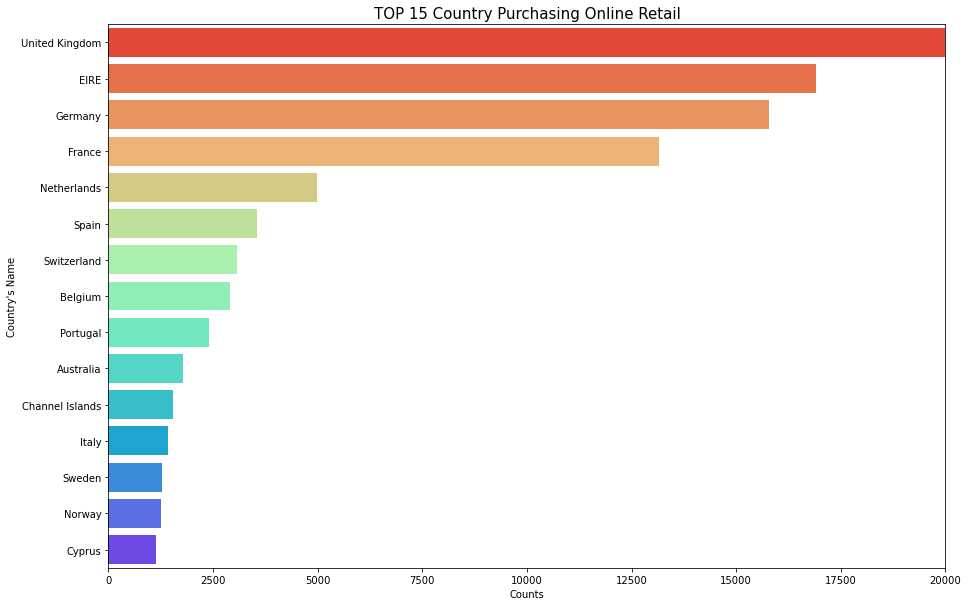

In [17]:
country_count = df['Country'].value_counts().head(15)
plt.figure(figsize=(15,10))
# plt.style.use('seaborn')
sns.barplot(x = country_count.values, y = country_count.index, palette='rainbow_r')
plt.xlabel('Counts')
plt.ylabel("Country's Name")
plt.title('TOP 15 Country Purchasing Online Retail', fontsize=15)
plt.xlim((0,20000));
plt.savefig('TOP 15 Country Purchasing Online Retail.jpg',pil_kwargs={'quality': 95, 'optimize':True});

**As we can see that total online customers and buying activity occured in UK then second place is a EIRE.**

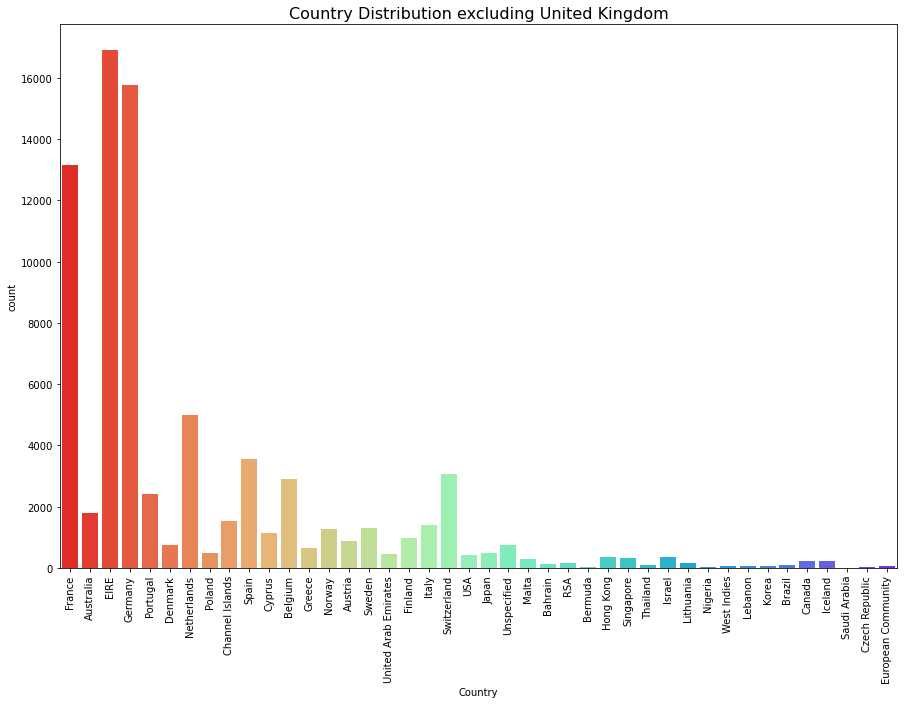

In [18]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country', data=df[df['Country']!="United Kingdom"], orient='v', palette='rainbow_r')
plt.xticks(rotation = 90)
plt.xlabel('Country')
plt.title('Country Distribution excluding United Kingdom',Fontsize = 16)
plt.savefig('Country Distribution excluding United Kingdom.jpeg',
            pil_kwargs={'quality': 95, 'optimize':True,'papertype':'letter'});

### Bottom Top 15  Countries on Purchasing

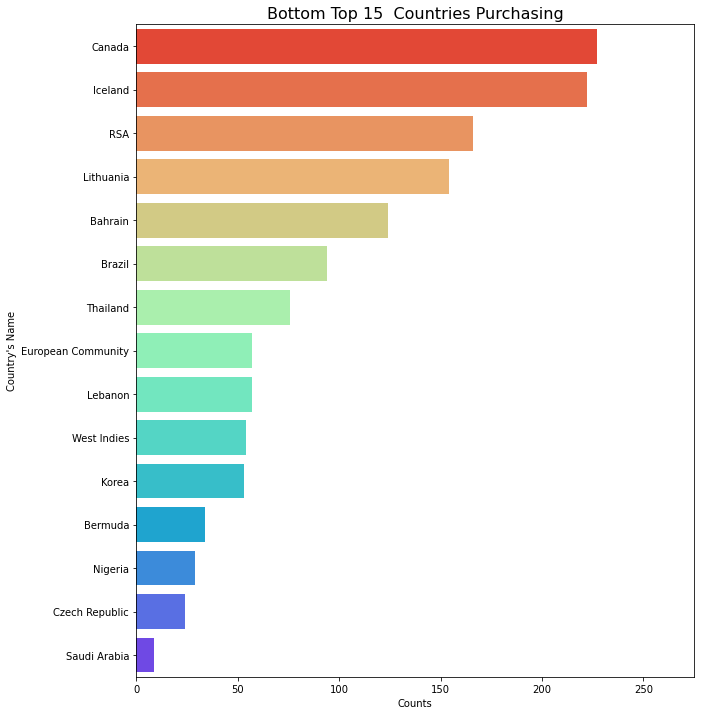

In [19]:
# checking the different values for country in the dataset

country_count1 = df['Country'].value_counts().tail(15)
plt.figure(figsize=(10,12))
# plt.style.use('seaborn')
sns.barplot(x = country_count1.values, y = country_count1.index, palette='rainbow_r')
plt.xlabel('Counts')
plt.ylabel("Country's Name")
plt.title('Bottom Top 15  Countries Purchasing', fontsize=16)
plt.xlim((0,275))
plt.savefig('Bottom Top 15  Countries Purchasing.jpeg',
            pil_kwargs={'quality': 95, 'optimize':True,'papertype':'letter'});

**Make data frame of sales by country**

In [20]:
# Sorting values by amount
sales_country = df.groupby('Country')[['Price','Quantity','Amount']].sum().sort_values(by='Amount', ascending=False).reset_index()
display(sales_country)

,Country,Price,Quantity,Amount
0,United Kingdom,3115349.25,9175904,16799849.90
1,EIRE,58321.77,336088,623414.16
2,Netherlands,11680.04,383625,549773.41
3,Germany,42730.11,223088,383289.00
4,France,34112.14,270582,311090.29
5,Australia,4943.96,103753,167800.01
6,Spain,10878.67,49996,97766.75
7,Switzerland,8819.66,52612,94024.59
8,Sweden,2740.05,88537,86319.14
9,Denmark,1795.00,237406,67422.69


**Sales percentage of *United Kingdom* of overall revenue**

In [21]:
print(round(sales_country[sales_country['Country']=='United Kingdom']['Amount']/sales_country['Amount'].sum(), 2)[0]*100, '% Sales of United Kingdom of Overall Revenue')

86.0 % Sales of United Kingdom of Overall Revenue


### Figure Map Over The World

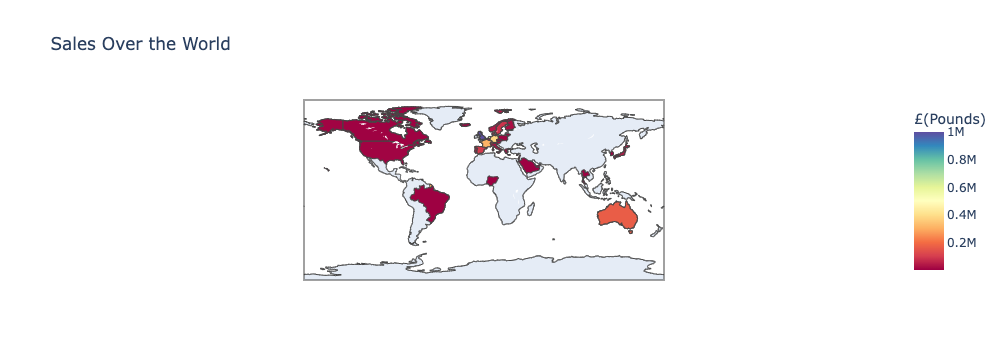

In [22]:
fig = go.Figure(data=go.Choropleth(
    locations= sales_country['Country'], # Replace state names with code
    locationmode= 'country names',
    z = sales_country['Amount'].astype(float),
    zmax= 1e+6,
    zmin= 3000,
#     autocolorscale = True,
    colorscale = 'spectral',
    colorbar_title = "£(Pounds)",
    text = sales_country['Country']
))


fig.update_layout(
    title_text = 'Sales Over the World',
    geo_scope="world", 
)

fig.show()

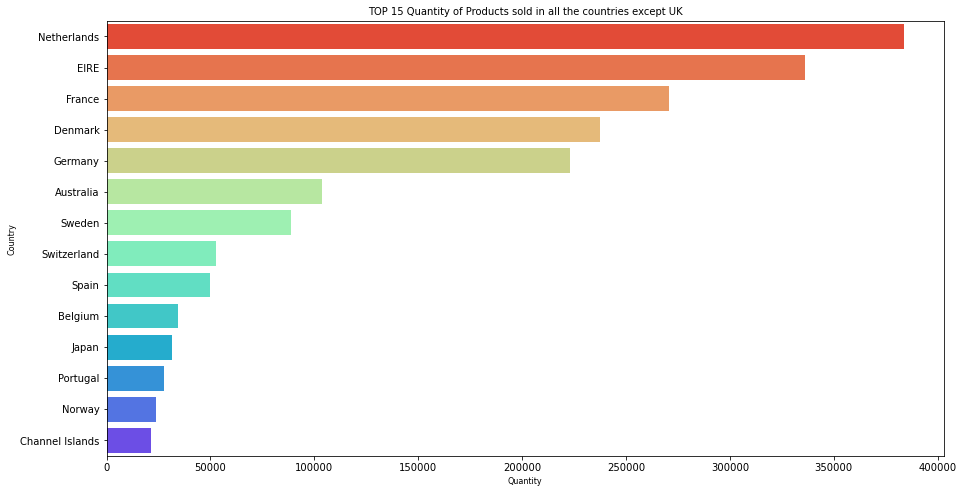

In [23]:
# Checking how many quantity of products have been sold Except UK

plt.figure(figsize=(15,8))
sns.barplot(x='Quantity',
            y='Country',
            data=sales_country[['Country','Quantity']].sort_values(by='Quantity', ascending=False)[1:15], 
            palette='rainbow_r')
plt.ylabel('Country', fontsize=8)
plt.xlabel('Quantity', fontsize=8)
plt.title('TOP 15 Quantity of Products sold in all the countries except UK', fontsize=10)
plt.savefig('TOP 15 Quantity of Products sold in all the countries except UK.jpeg',
            pil_kwargs={'quality': 95, 'optimize':True,'papertype':'letter'});

**Bottom 20 Countries in terms of Quantities according to the countries**

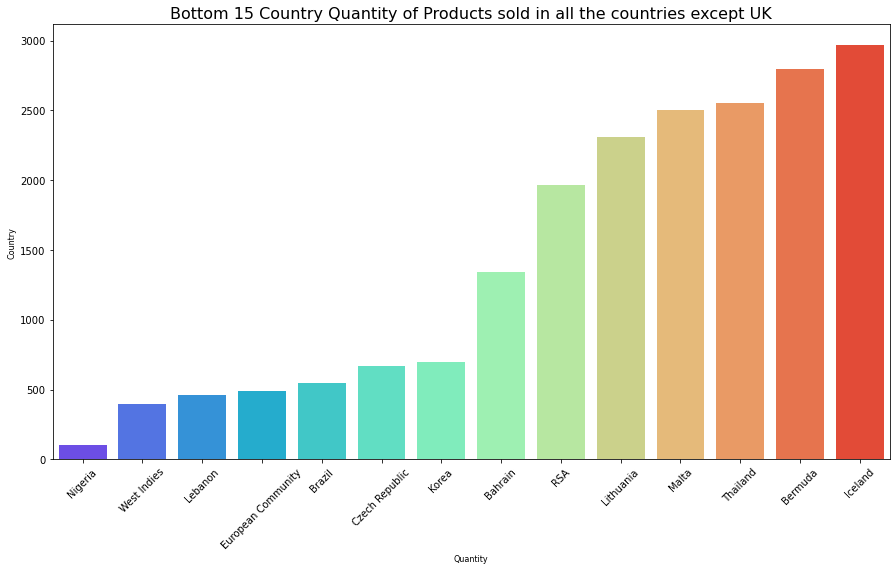

In [25]:
plt.figure(figsize=(15,8))
sns.barplot(x='Country',
            y='Quantity',
            data=sales_country[['Country','Quantity']].sort_values(by='Quantity')[1:15], 
            palette='rainbow')
plt.ylabel('Country', fontsize=8)
plt.xlabel('Quantity', fontsize=8)
plt.xticks(rotation = 45)
plt.title('Bottom 15 Country Quantity of Products sold in all the countries except UK', fontsize=16)
plt.savefig('Bottom 15 Country Quantity of Products sold in all the countries except UK.jpeg',
            pil_kwargs={'quality': 95, 'optimize':True,'papertype':'letter'});

In [12]:
# labels = ["US", "China", "European Union", "Russian Federation", "Brazil", "India","Rest of World"]

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=sales_country['Country'].head(5).tolist(),
                     values=sales_country['Amount'].head(5).tolist(), 
                     name="Country Sales Amount"),
              1, 1)
fig.add_trace(go.Pie(labels=sales_country['Country'].head(5).tolist(),
                     values=sales_country['Quantity'].head(5).tolist(), 
                     name="Country's Quantity"),
              1, 2)

fig.add_trace(go.Pie(labels=sales_country['Country'].head(5).tolist(),
                     values=sales_country['Price'].head(5).tolist(), 
                     name="Country's Price Sum"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Top 5 Countries by Sales Amount, Quantity, & Price",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Sales Amount', x=0.095, y=0.5, font_size=10, showarrow=False),
                 dict(text='Quantity', x=0.50, y=0.5, font_size=10, showarrow=False),
                 dict(text='Price', x=0.88, y=0.5, font_size=10, showarrow=False)])
fig.show()

According Three Bar Chart above we conclude that the most buying activity occured in UK and then the second place is EIRE (Ireland) followed by Germany then France.

Look up to the `Barchart` Top 15 of Quantity. Despite of EIRE took the second place in Country Distribution of all the time, Netherlands took that place. Its mean Netherland contributeS to the revenue to Online Retail Company.

According to that chart and RFM Analysis in further, I'm gonna examine just Top 5 Country in Sales `Amount`, which contributes revenue to Online Retail thorugh time series

In [13]:
print( f" The Date: First purchasing activity on {df['InvoiceDate'].min()} and Last purchasing activity on {df['InvoiceDate'].max()}")

 The Date: First purchasing activity on 2009-12-01 07:45:00 and Last purchasing activity on 2011-12-09 12:50:00


We have 52 weeks in a year. Those data provide a small number in a 2009, so I'm gonna separate `DataFrame` into two parts. Week's number in 2009 is 48 where we have a 52 weeks in a year. Separating `DataFrame` just to make easier when comes into *Time Series* Analysis.

In [14]:
df9 = df[df['Year'] == 2009] # In year 2009
dfr = df[df['Year'] != 2009] # Exclude year 2009

cats_month = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
dfr['Month'] = pd.Categorical(dfr['Month'], ordered=True, categories=cats_month)
df9['Month'] = pd.Categorical(df9['Month'], ordered=True, categories=cats_month)
df['Month'] = pd.Categorical(df['Month'], ordered=True, categories=cats_month)

cats_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dfr['Day of Week'] = pd.Categorical(dfr['Day of Week'], ordered=True, categories=cats_day)
df9['Day of Week'] = pd.Categorical(df9['Day of Week'], ordered=True, categories=cats_day)
df['Day of Week'] = pd.Categorical(df['Day of Week'], ordered=True, categories=cats_day)

cats_date = [i for i in range(1,32)]
dfr['Date'] = pd.Categorical(dfr['Date'], ordered=True, categories=cats_date)
df9['Date'] = pd.Categorical(df9['Date'], ordered=True, categories=cats_date)
df['Date'] = pd.Categorical(df['Date'], ordered=True, categories=cats_date)


cats_hour = [hour for hour in range(1,25)]
dfr['Hour'] = pd.Categorical(dfr['Hour'], ordered=True, categories=cats_hour)
df9['Hour'] = pd.Categorical(df9['Hour'], ordered=True, categories=cats_hour)
df['Hour'] = pd.Categorical(df['Hour'], ordered=True, categories=cats_hour)

cats_week = [i for i in range(1, 53)]
dfr['Week of Year'] = pd.Categorical(dfr['Week of Year'], ordered=True, categories=cats_week)
df9['Week of Year'] = pd.Categorical(df9['Week of Year'], ordered=True, categories=cats_week)
df['Week of Year'] = pd.Categorical(df['Week of Year'], ordered=True, categories=cats_week)

## **How Orders take an effects on Amount Sales?**

### United Kingdom

In [15]:
mpl.rcParams.update(mpl.rcParamsDefault)

In [52]:
# Defining a function to plot time-series Month in Year plot for any country

def time_series_month(country):
    df_country = df[df['Country'] == country]
    plt.style.use('bmh')
    fig, ax1 = plt.subplots(figsize=(12,7))

    ax2 = ax1.twinx()
    sns.lineplot(x = 'Month', y = 'Amount',
                 data=df_country, 
                 hue='Year', style='Year',
                 palette=['red','green','orange'], markers=True, legend='full',
                 ci=None, estimator='sum', ax=ax2)
    sns.barplot(x= 'Month', y= 'Invoice',
                data=df_country.groupby('Month', as_index=False)['Invoice'].count(),
                palette = 'winter_r',
                ci=None, ax=ax1)
    
    
    ax1.set_ylabel('Orders Count All Year', fontsize=12)
    ax2.set_ylabel('Amount Sales', fontsize=12)
    
    plt.gca().set_yticklabels(['%.f' % x for x in plt.gca().get_yticks()])
    plt.legend(loc='best')
    plt.grid(axis='both', which='both')
    plt.title(f"Country {country} Orders and Amount Sales", fontsize=13)
    fig.tight_layout()
    plt.savefig(f"Country {country} Orders and Amount Sales.jpeg",
            pil_kwargs={'quality': 95,'papertype':'letter'});

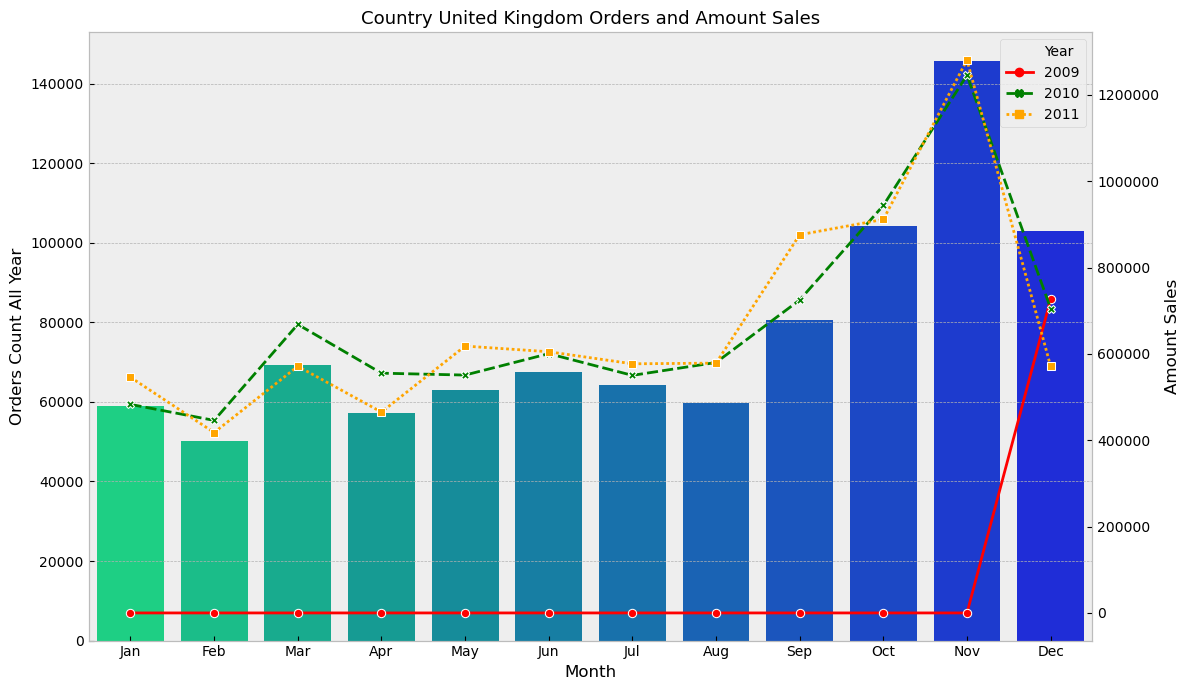

In [53]:
time_series_month('United Kingdom')

### EIRE / Ireland

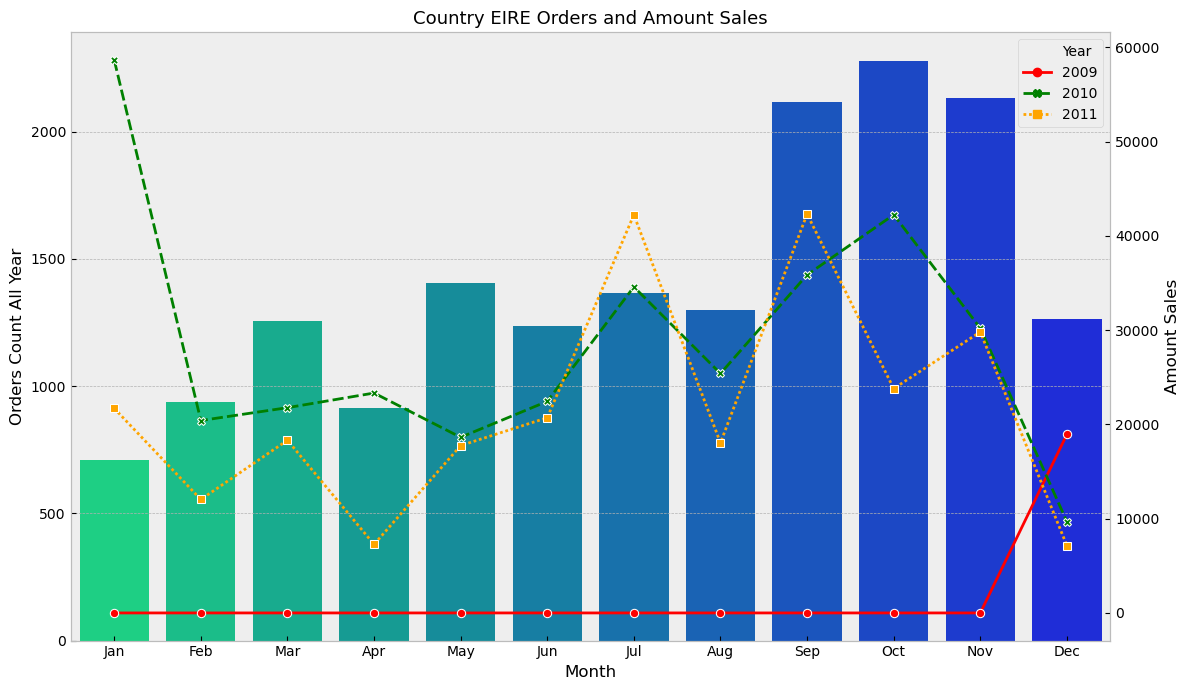

In [54]:
time_series_month('EIRE')

### Netherlands

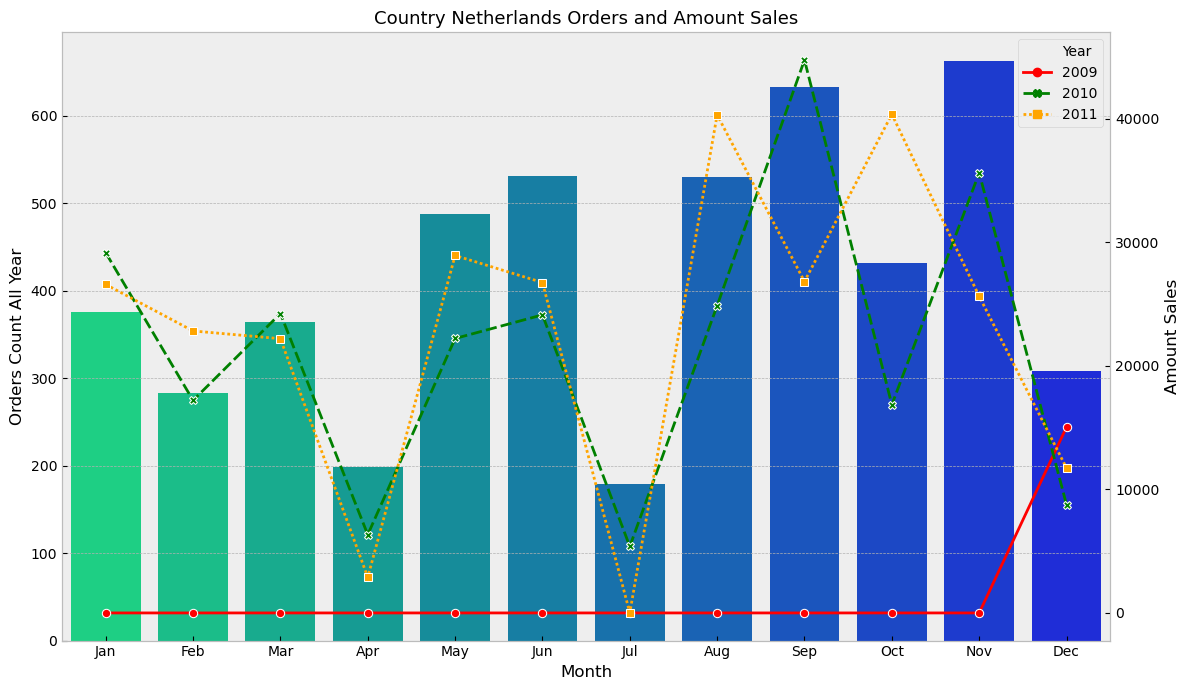

In [55]:
time_series_month('Netherlands')

### Germany

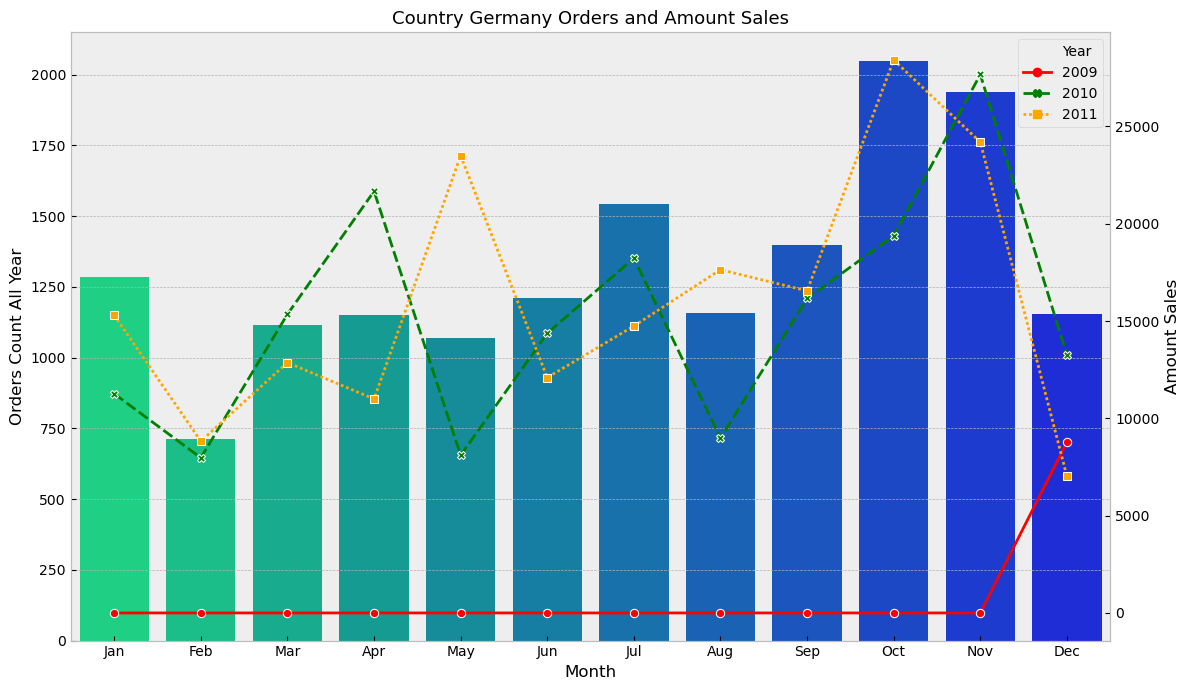

In [56]:
time_series_month('Germany')

### France

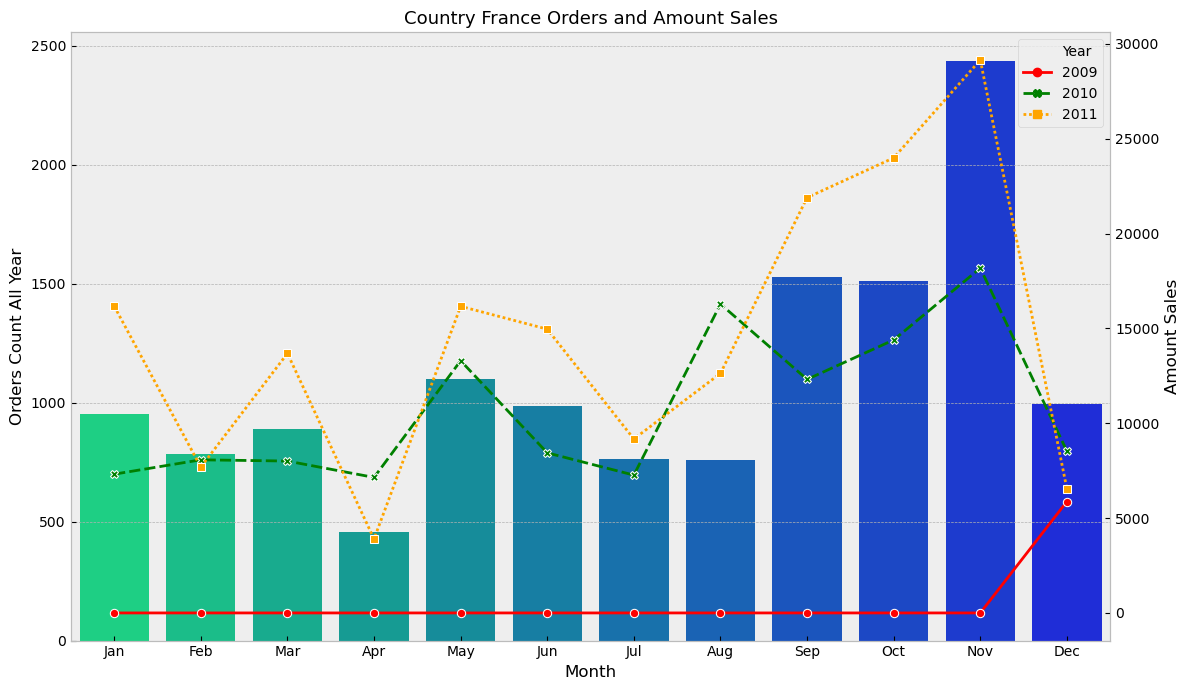

In [57]:
time_series_month('France')

### ***Business Insights From Top 5 Country Based Time Series Bar and Line Plot***

Does month in a year will take an part in buying session? Which related customer's behavioural purchased on E-Commerce / Online Retail. The answer is YES.


The bar plot and line plot tell us that **`Invoice`** take an effect for **`Ammount Sales`** in each **`Month`**. More on orders is more amount of sales that we get. 

- Which Month on top 5 Countries that high session of buying activity?

    - September
    
    - October
    
    - November
    
- Which Month on top 5 Countries that have a low session of buying activity?

    - February
    
    - March
    
    - April
    
    - August (Netherlands Only)

## RFM Analysis

**I'm gonna analysis Customer behaviour based on 3 Factors**

- R (Recency): Number of days since last purchase.

- F (Frequency): Number of transactions.

- M (Monetary): Total amount of transactions (revenue contributed) or Sales Activity

Customer Segmentation:

Customer segmentation is similarly the process of dividing an organization’s customer bases into different sections or segments based on various customer attributes. The process of customer segmentation is based on the premise of finding differences among the customers’ behavior and patterns.

The major objectives and benefits behind the motivation for customer segmentation are:

Higher Revenue: This is the most obvious requirement of any customer segmentation project.

Customer Understanding: One of the mostly widely accepted business paradigms is “know your customer” and a segmentation of the customer base allows for a perfect dissection of this paradigm.

Target Marketing: The most visible reason for customer segmentation is the ability to focus marketing efforts effectively and efficiently. If a firm knows the different segments of its customer base, it can devise better marketing campaigns which are tailor made for the segment. A good segmentation model allows for better understanding of customer requirements and hence increases the chances of the success of any marketing campaign developed by the organization.

Optimal Product Placement: A good customer segmentation strategy can also help the firm with developing or offering new products, or a bundle of products together as a combined offering.

Finding Latent Customer Segments: Finding out which segment of customers it might be missing to identifying untapped customer segments by focused on marketing campaigns or new business development.
Clustering:

The most obvious method to perform customer segmentation is using unsupervised Machine Learning methods like clustering. The method is as simple as collecting as much data about the customers as possible in the form of features or attributes and then finding out the different clusters that can be obtained from that data. Finally, we can find traits of customer segments by analyzing the characteristics of the clusters.

Exploratory Data Analysis:

Using exploratory data analysis is another way of finding out customer segments. This is usually done by analysts who have a good knowledge about the domain relevant to both products and customers. It can be done flexibly to include the top decision points in an analysis.

RFM Model for Customer Value:
Since our dataset is limited to the sales records, and didn´t include anothers information about our customers, we will use a RFM,*Recency, Frequency and Monetary Value, based model of customer value for finding our customer segments. The RFM model will take the transactions of a customer and calculate three important informational attributes about each customer:

Recency: The value of how recently a customer purchased at the establishment

Frequency: How frequent the customer’s transactions are at the establishment

Monetary value: The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment
Recency


To create the recency feature variable, we need to decide the reference date for our analysis. Usually, we make use of the last transaction date plus one day. Then, we will construct the recency variable as the number of days before the reference date when a customer last made a purchase.